<a href="https://colab.research.google.com/github/lagosmanuel/ML-ANN/blob/main/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2 - Inteligencia Artificial 2024 ü§ñ

### Comisi√≥n 5 - Manuel Lagos


---



# Importar las librer√≠as necesarias

In [1]:
!pip install scikeras

# Importar las librer√≠as
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import scikeras

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from tensorflow import keras
from keras import Sequential, layers, Input
from scikeras.wrappers import KerasClassifier

from pandas.api.types import is_numeric_dtype
from math import floor

# Carga y an√°lisis de datos

In [2]:
# Cargar el dataset
df = pd.read_csv("football_train.csv")
print(f"El conjunto tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El conjunto tiene 5320 filas y 22 columnas.


In [97]:
df.sample(10)

Goals  Shots  Shots_on_target  Corners  Fouls_commited  Offsides  \
3749   17.0    286               88      114             321         0   
1216    2.0     14                6        5              11         0   
868    30.0    324              108      142             292         0   
4639   14.0     66               30       21              36         0   
3094   17.0    192               60       85             155         0   
1886   42.0    350              147      122             283         0   
1616   23.0    211               70       77             190         0   
2640   35.0    326              116      125             202         0   
4324   29.0    309              104      131             340         0   
5053   51.0    417              152      135             411         0   

      Yellow_cards  Red_cards  Corners_received  Fouls_received  ...  \
3749          45.0        1.0               140             265  ...   
1216           1.0        0.0                10              10  ...   
868           44.0        0.0               220             381  ...   
4639           2.0        0.0                 8              45  ...   
3094          19.0        0.0               101             178  ...   
1886          52.0        3.0               134             257  ...   
1616          37.0        1.0               144             187  ...   
2640          11.0        0.0                63             202  ...   
4324          47.0        3.0               188             309  ...   
5053          57.0        2.0               236             410  ...   

      Shots_on_target_received  Goals_received  Played_Matches  Season  \
3749                       122              37              26    2021   
1216                         4               0               1    1718   
868                        149              36              33    1718   
4639                        17               3               4    2223   
3094                        80              23              17    2021   
1886                       126              37              25    1819   
1616                       106              33              21    1819   
2640                        60              27              19    1920   
4324                       155              64              31    2122   
5053                       178              68              38    2223   

                     City             Stadium Stadium_capacity  \
3749               London      Craven Cottage            24500   
1216  Newcastle upon Tyne      St James' Park            52305   
868               Burnley           Turf Moor            21944   
4639               London    Emirates Stadium            60704   
3094              Burnley           Turf Moor            21944   
1886           Manchester        Old Trafford            74310   
1616              Burnley           Turf Moor            21944   
2640               London     Stamford Bridge            41837   
4324              Watford       Vicarage Road            22200   
5053            Leicester  King Power Stadium            32312   

                           Ownership Dominant_team  Position  
3749                     Shahid Khan           2.0         3  
1216    Saudi Public Investment Fund           2.0         2  
868                      ALK Capital           2.0         1  
4639  Kroenke Sports & Entertainment           0.0         0  
3094                     ALK Capital           2.0         2  
1886                   Glazer family           2.0         1  
1616                     ALK Capital           2.0         2  
2640                     Todd Boehly           1.0         0  
4324                      Gino Pozzo           2.0         3  
5053  King Power International Group           2.0         3  

[10 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Team                      5320 non-null   object 
 1   Goals                     4856 non-null   float64
 2   Shots                     5320 non-null   int64  
 3   Shots_on_target           5320 non-null   int64  
 4   Corners                   5320 non-null   int64  
 5   Fouls_commited            5320 non-null   int64  
 6   Offsides                  5320 non-null   int64  
 7   Yellow_cards              2157 non-null   float64
 8   Red_cards                 5029 non-null   float64
 9   Corners_received          5320 non-null   int64  
 10  Fouls_received            5320 non-null   int64  
 11  Shots_received            5320 non-null   int64  
 12  Shots_on_target_received  5320 non-null   int64  
 13  Goals_received            5320 non-null   int64  
 14  Played_M

In [ ]:
# Buscar atributos que no sean de tipo num√©rico
for attr in df.columns:
  if (not is_numeric_dtype(df[attr])):
    print(f"El atributo {attr} no es de tipo num√©rico, es de tipo {df[attr].dtype}.")

In [ ]:
# Buscar atributos que tengan valores nulos
for attr in df.columns:
  na_count = df[attr].isna().sum()
  if (na_count > 0):
    print(f"Para el atributo {attr} hay {na_count} ejemplos nulos.")

# Procesamiento de los datos

In [3]:
# Mapeo los valores del atributo Dominant_team a un n√∫mero
dominant_values = df["Dominant_team"].unique()
print(f"Los valores del atributo Dominant_team son: {dominant_values}")

map_dominant = {
    "very_dominant": 0,
    "dominant": 1,
    "not_dominant": 2,
}

df["Dominant_team"] = df["Dominant_team"].map(map_dominant)

Los valores del atributo Dominant_team son: ['not_dominant' 'dominant' '0' 'very_dominant']


In [4]:
# Mapeo los valores del atributo Position a un n√∫mero
position_values = df["Position"].unique()
print(f"Los valores del atributo Position son: {position_values}")

map_position = {
    "top-4": 0,
    "5-a-7": 1,
    "media-tabla": 2,
    "descenso": 3
}

df["Position"] = df["Position"].map(map_position).astype("Int64")

Los valores del atributo Position son: ['media-tabla' nan '5-a-7' 'descenso' 'top-4']


In [5]:
# Elimino las columnas que considero que no son relevantes
df.drop(columns=["City"], inplace=True, errors="ignore")
df.drop(columns=["Stadium"], inplace=True, errors="ignore")
df.drop(columns=["Stadium_capacity"], inplace=True, errors="ignore")
df.drop(columns=["Ownership"], inplace=True, errors="ignore")

In [6]:
# Funci√≥n para rellenar los valores faltantes de la columna 'attr' en el dataframe 'df'
def fill_attr(df, attr):
  for index, row in df[df[attr].isna()].iterrows():
    values = []
    team = row["Team"]
    season = row["Season"]

    prev_row = df.iloc[index-1] if index-1 > 0 else None
    next_row = df.iloc[index+1] if index+1 < len(df) else None

    if (prev_row is not None and not pd.isna(prev_row[attr])
        and prev_row["Team"] == team and prev_row["Season"] == season):
      values.append(prev_row[attr])

    if (next_row is not None and not pd.isna(next_row[attr])
        and next_row["Team"] == team and next_row["Season"] == season):
      values.append(next_row[attr])

    if (values != []):
      df.at[index, attr] = floor(sum(values)/len(values))


In [7]:
# Relleno los valores faltantes de las siguientes columnas:
fill_attr(df, "Goals")
fill_attr(df, "Position")
fill_attr(df, "Yellow_cards")
fill_attr(df, "Red_cards")
fill_attr(df, "Dominant_team")

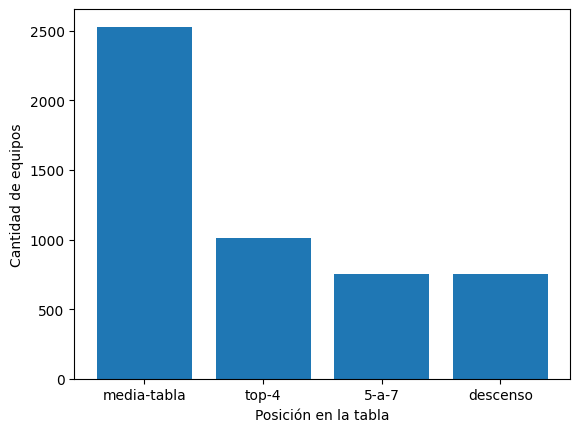

In [ ]:
# Distribuci√≥n de los ejemplos (filas del dataset) para cada clase
map_position_inv = {v: k for k, v in map_position.items()}
position_counts = df["Position"].map(map_position_inv).value_counts()

# Crear el histograma
plt.bar(position_counts.index, position_counts.values)

# Agregar etiquetas y t√≠tulo
plt.xlabel("Posici√≥n en la tabla")
plt.ylabel("Cantidad de equipos")

# Mostrar el histograma
plt.show()

In [8]:
# Elimino la columna Team
df.drop(columns=["Team"], inplace=True, errors="ignore")

In [9]:
# Elimino los ejemplos que hayan quedado con valores nulos
df.dropna(inplace=True)

In [10]:
# Valores de la columna target.
Y = df["Position"].values

# Porci√≥n del dataframe con los atributostrain_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1).
X = df.drop(columns = ["Position"])

In [11]:
# Porcentajes para datos de validaci√≥n y test.
test_size = 0.15
val_size = 0.10

# La funci√≥n train_test_split separa los datos (X, Y) en dos porciones
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size, random_state = 10)

# Nos guardamos los nombres de los atributos para m√°s adelante
feature_names = X_train.columns.values[:-1]

print("Datos de entrenamiento:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_train.shape[0], X_train.shape[1]))
print("Datos de validaci√≥n:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_val.shape[0], X_val.shape[1]))
print("Datos de test:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}".format(X_test.shape[0], X_test.shape[1]))

Datos de entrenamiento:
	Cantidad de ejemplos (filas): 3991
	Cantidad de atributos (columnas): 16

Datos de validaci√≥n:
	Cantidad de ejemplos (filas): 444
	Cantidad de atributos (columnas): 16

Datos de test:
	Cantidad de ejemplos (filas): 783
	Cantidad de atributos (columnas): 16


In [ ]:
train_df = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
val_df = pd.concat([X_val.reset_index(drop=True), pd.DataFrame(y_val).reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

# Desarrollo de un √Årbol de Decisi√≥n

In [ ]:
# Creamos un √°rbol de decisi√≥n (AD)
max_depth_range = [4, 8, 16, 32, 64, 128, 256]
min_samples_leaf_range = [1, 2, 3, 4, 5]
criterion_range = ["gini", "entropy"]
class_weights = dict(enumerate(compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)))

tree_params = dict(
  criterion: criterion_range,
  max_depth: max_depth_range,
  min_samples_leaf: min_samples_leaf_range
)

clf = GridSearchCV(DecisionTreeClassifier(class_weight = class_weights), tree_params, cv=5)

# Se ajusta el AD con los datos de entrenamiento
clf = clf.fit(X_train, y_train)

param_grid = pd.concat([pd.DataFrame(clf.cv_results_["params"]), pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
param_best = clf.best_params_
score_best = clf.best_score_

print(param_grid)
print(f"El mejor score obtenido es: {score_best}")
print(f"La combinaci√≥n de par√°metros es: {param_best}")
print(f"El peso de las clases es: {class_weights}")

Fitting 5 folds for each of 70 candidates, totalling 350 fits
   criterion  max_depth  min_samples_leaf  Accuracy
0       gini          4                 1  0.679782
1       gini          4                 2  0.679531
2       gini          4                 3  0.679531
3       gini          4                 4  0.681035
4       gini          4                 5  0.679783
..       ...        ...               ...       ...
65   entropy        256                 1  0.784014
66   entropy        256                 2  0.778248
67   entropy        256                 3  0.766724
68   entropy        256                 4  0.760463
69   entropy        256                 5  0.750691

[70 rows x 4 columns]
El mejor score obtenido es: 0.7910288863585748
La combinaci√≥n de par√°metros es: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 1}
El peso de las clases es: {0: 1.2379032258064515, 1: 1.6882402707275803, 2: 0.49912456228114055, 3: 1.676890756302521}


In [ ]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       143
         1.0       0.71      0.59      0.64       114
         2.0       0.82      0.85      0.83       397
         3.0       0.76      0.71      0.74       129

    accuracy                           0.79       783
   macro avg       0.77      0.75      0.76       783
weighted avg       0.79      0.79      0.79       783



# Desarrollo de una Red Neuronal Artificial

In [12]:
# Onehot encoder
enc = OneHotEncoder()

# El encoder define un mapeo para las etiquetas.
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1)).toarray()
y_val_enc = enc.transform(y_val.reshape(-1, 1)).toarray() # Aqu√≠ usar transform.
y_test_enc = enc.transform(y_test.reshape(-1, 1)).toarray() # Aqu√≠ usar transform.

In [13]:
num_features = X_train.shape[1]
num_outputs = y_train_enc.shape[1]

def define_model(neurons, hidden_layers, activation, learning_rate):
    model = Sequential()

    # Capa de entrada de la red
    model.add(Input(shape=(num_features, )))

    # Capas ocultas
    for i in range(hidden_layers):
      model.add(layers.Dense(neurons, activation = activation))

    # Capa de salida de la red
    model.add(layers.Dense(num_outputs, activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    return model

In [18]:
neurons = 100
hidden_layers = 5
activation = "silu"
learning_rate = 1e-3
eps = 300
bs = 16

model = define_model(neurons, hidden_layers, activation, learning_rate)
model.summary()

Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_17 (Dense)                     ‚îÇ (None, 100)                 ‚îÇ           1,700 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_18 (Dense)                     ‚îÇ (None, 100)                 ‚îÇ          10,100 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_19 (Dense)                     ‚îÇ (None, 100)                 ‚îÇ          10,100 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_20 (Dense)                     ‚îÇ (None, 100)                 ‚îÇ          10,100 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_21 (Dense)                     ‚îÇ (None, 100)                 ‚îÇ          10,100 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_22 (Dense)                     ‚îÇ (None, 4)                   ‚îÇ             404 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 42,504 (166.03 KB)

 Trainable params: 42,504 (166.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
result = model.fit(X_train, y_train_enc, batch_size = bs, epochs = eps, validation_data=(X_val, y_val_enc))

Epoch 1/300
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.4190 - loss: 9.0602 - val_accuracy: 0.5923 - val_loss: 0.9543
Epoch 2/300
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.5526 - loss: 1.3104 - val_accuracy: 0.6554 - val_loss: 0.8858
Epoch 3/300
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.6287 - loss: 0.9514 - val_accuracy: 0.6644 - val_loss: 0.7449
Epoch 4/300
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.6400 - loss: 0.8536 - val_accuracy: 0.6284 - val_loss: 0.8312
Epoch 5/300
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 0.6511 - loss: 0.8165 - val_accuracy: 0.6622 - val_loss: 0.8111
Epoch 6/300
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.6783 - loss: 0.7558 - val_accuracy: 0.6059 - val

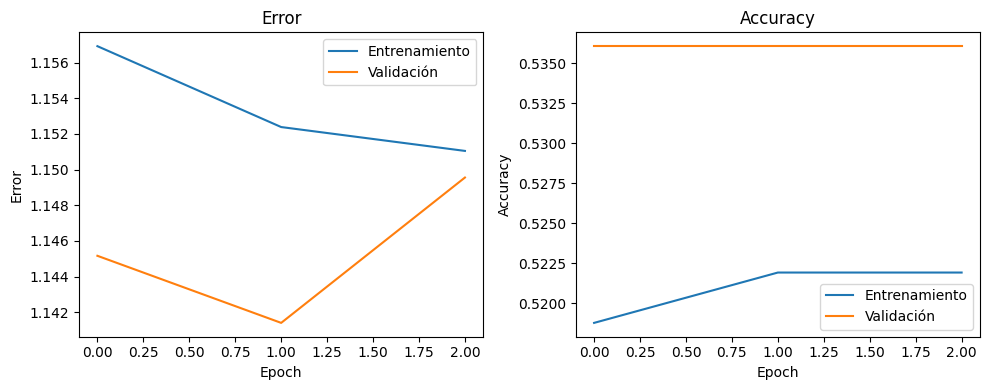

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Error
ax1.plot(result.history['loss'], label='Entrenamiento')
ax1.plot(result.history['val_loss'], label='Validaci√≥n')
ax1.set_title('Error')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Error')
ax1.legend()

# Accuracy
ax2.plot(result.history['accuracy'], label='Entrenamiento')
ax2.plot(result.history['val_accuracy'], label='Validaci√≥n')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()